# Univariate

Firstly, we import the data and the necessary libraries with this code:

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

path="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(path,names=headers)


C:\Users\claud\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
C:\Users\claud\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\claud\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


We check if the chosen variables are of the correct data type

In [2]:
print(df["price"].dtype)
print(df["wheel-base"].dtype)

print(df["bore"].dtype)

print(df["stroke"].dtype)

print(df["horsepower"].dtype)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)

object
float64
object
object
object


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


There are some missing values noted by "?". We want to drop these rows to work with the rest.

In [3]:
df = df.drop(df[(df.price == "?") | (df.bore == "?") | (df.stroke == "?") | (df.horsepower == "?")].index)

We then run all four simple linear regressions to obtain the coefficients and the intercepts:

In [4]:
X = df["wheel-base"].astype(float)
y = df.price.astype(int)


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     100.8
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           2.35e-19
Time:                        11:20:27   Log-Likelihood:                -1989.1
No. Observations:                 195   AIC:                             3982.
Df Residuals:                     193   BIC:                             3989.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.286e+04   7594.431     -8.278      0.0

C:\Users\claud\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [5]:
X = df["bore"].astype(float)
y = df.price.astype(int)


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     82.35
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           1.33e-16
Time:                        11:20:27   Log-Likelihood:                -1995.4
No. Observations:                 195   AIC:                             3995.
Df Residuals:                     193   BIC:                             4001.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.071e+04   5965.422     -6.824      0.0

C:\Users\claud\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [6]:
X = df["stroke"].astype(float)
y = df.price.astype(int)


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.711
Date:                Wed, 15 Feb 2023   Prob (F-statistic):              0.192
Time:                        11:20:27   Log-Likelihood:                -2029.2
No. Observations:                 195   AIC:                             4062.
Df Residuals:                     193   BIC:                             4069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5433.0247   6001.870      0.905      0.3

C:\Users\claud\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [7]:
X = df["horsepower"].astype(int)
y = df.price.astype(int)


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     370.9
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           8.14e-47
Time:                        11:20:27   Log-Likelihood:                -1925.5
No. Observations:                 195   AIC:                             3855.
Df Residuals:                     193   BIC:                             3862.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4570.1092    985.088     -4.639      0.0

C:\Users\claud\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


From the regressions above, we can see that horsepower, bore and wheel-base affect a car's price, whilst stroke does not. If a car's horsepower  or bore increases by one, its price will increase by about 9 monetary units whilse if its wheel-base increases by one, its price will increase by about 10.

A simple linear regression is given by the following formula:
    
$y = \alpha + \beta x $

Where, y is the dependent variable and x is the explanatory variables. $\beta$ is the coefficient and $\alpha$ the intercept given by the following formula.

$\hat{\alpha} = \overline{x}+\hat{\beta}x$

Where $\hat{\beta} $ is given by:

$\hat{\beta} = \frac{\Sigma^n_{i=1} (x_i - \overline{x})(y_i - \overline{y})} {\Sigma^n_{i=1} (x_i - \overline{x})^2}$

# Multivariate

This time we will use all of the variables used above to predict vehicle price

In [8]:
X = df[["wheel-base", "bore", "stroke", "horsepower"]].astype(float)
y = df.price.astype(int)

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     143.4
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           2.98e-56
Time:                        11:20:27   Log-Likelihood:                -1894.5
No. Observations:                 195   AIC:                             3799.
Df Residuals:                     190   BIC:                             3815.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.108e+04   6008.883     -6.837      0.0

C:\Users\claud\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


From the output above we can see that by taking into account other factors, bore does not have a statistically significant effect on car price anymore. On the other hand, the effect of a car's wheel-base and horsepower had increased dramatically. Now, when a car's wheel-base increases by 1, its price is estimated to increase by 450 currency units. At the same time, if a car's horsepower increases by 1, its price will increase by around 150 currency units.

In this case, out model was: 

$y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4$

Where $ \alpha $ is the intercept, $x_1 $ is a car's wheel-base, $ x_2 $is its bore, $ x_3$ is its stroke and $x_4$ the car's horsepower

# Polynomial

Now we run the model by squaring the two variables that were statistically insignificant to see if a polynomial fit is a better fit for the data.

In [9]:
df["bore2"] = df["bore"].astype(float) ** 2
df["stroke2"] = df["stroke"].astype(float) **2

In [10]:
X = df[["wheel-base", "bore2", "stroke2", "horsepower"]].astype(float)
y = df.price.astype(int)

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     143.3
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           3.07e-56
Time:                        11:20:27   Log-Likelihood:                -1894.5
No. Observations:                 195   AIC:                             3799.
Df Residuals:                     190   BIC:                             3815.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.374e+04   4882.927     -8.957      0.0

C:\Users\claud\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


From the output above, we can see that using a quadratic specification does not fit the data any better and is roughly equivalent to a linear specification meaning that the findings from the multivariate section still apply.

We can try to plot the relationship between the non-significant variables and price to see if there is some sort of relationship.

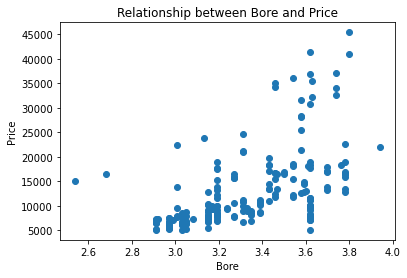

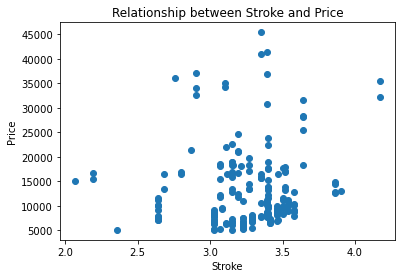

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import math


plt.scatter(df.bore.astype(float), df.price.astype(int))
plt.xlabel("Bore")
plt.ylabel("Price")
plt.title("Relationship between Bore and Price")
plt.show()
plt.clf()

plt.scatter(df.stroke.astype(float), df.price.astype(int))
plt.xlabel("Stroke")
plt.ylabel("Price")
plt.title("Relationship between Stroke and Price")
plt.show()
plt.clf()

We can see that there is some sort of relationship at least for bore. It might be the case that outliers are making it statistically insignificant. To try to fix this, we are going to try to log the price variable

In [12]:
df["ln_price"] = np.log(df["price"].astype(int))

In [13]:
X = df[["wheel-base", "bore", "stroke", "horsepower"]].astype(float)
y = df.ln_price.astype(int)

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     91.53
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           3.11e-43
Time:                        11:20:27   Log-Likelihood:                -78.759
No. Observations:                 195   AIC:                             167.5
Df Residuals:                     190   BIC:                             183.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3245      0.543      6.120      0.0

C:\Users\claud\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Taking the log of price, shows turns both stroke and bore into statistically significant variables at the level of 10%. From the output, we see that if wheel-base increases by 1, the car's price will increase 3,2%. In the case of bore and stroke, if they increase by 1, the car's price will increase by 22,1% and 17,1%. FInally, if horsepower increases by 1, the car's price goes up by 0,9%.

Comparing the log-likelihood between the logged model, the quadratic model and the linear one, the one with the highest value is the logged model which indicates that the logged model offers the best fit for the data.